### В этом Notebook:
1. Познакомимся с многомерным (более 2-ух измерений) рисованием и анализом данных в Seaborn

In [ ]:
# Выполни прежде чем проходить Notebook
from google.colab import drive
import os
drive.mount ('/content/gdrive', force_remount=True)

%run /content/gdrive/MyDrive/03_Data_Visualization/0_package_installation.ipynb
# Перезагрузка ядра
os.kill(os.getpid(), 9)

Mounted at /content/gdrive


##  Многомерный анализ с помощью Seaborn
Многомерная визуализации - это расширение двумерного анализа, когда мы добавляем еще одну переменную (или переменные). Часто добавление третьей переменной помогает нам найти какую-то важную закономерность или информацию, которую мы не могли заметить раньше.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/penguins.csv')
penguins.dropna(inplace = True)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Сопоставление третьей переменной с кодировкой
Существует 3 способа отображения третьей переменной для создания визуальной картины:
- кодирование цветом
- кодирование с размером
- кодирование с помощью формы

Выбор подходящей кодировки опять же зависит от поставленного вопроса, исходных данных или цели визуализации. Давайте рассмотрим несколько примеров.

## 1. Визуализация распределения
### 1.1 Ящик с усами
Как мы уже упоминали в Notebook по двумерному анализу, ящики с усами отлично подходят для сравнения нескольких групп. Допустим, мы хотим посмотреть распределение массы тела пингвинов в зависимости от острова. Нас также интересует, есть ли различия в диапазонах значений между самками и самцами. Как и раньше, мы строим график по первой категориальной переменной "island", затем по числовой переменной "body_mass_g" и передаем третью групповую переменную "sex" в параметр **hue**.


Здесь третья переменная отображается с помощью цветового кодирования, которая создает различные цвета и визуально помогает определить уровни подмножества.

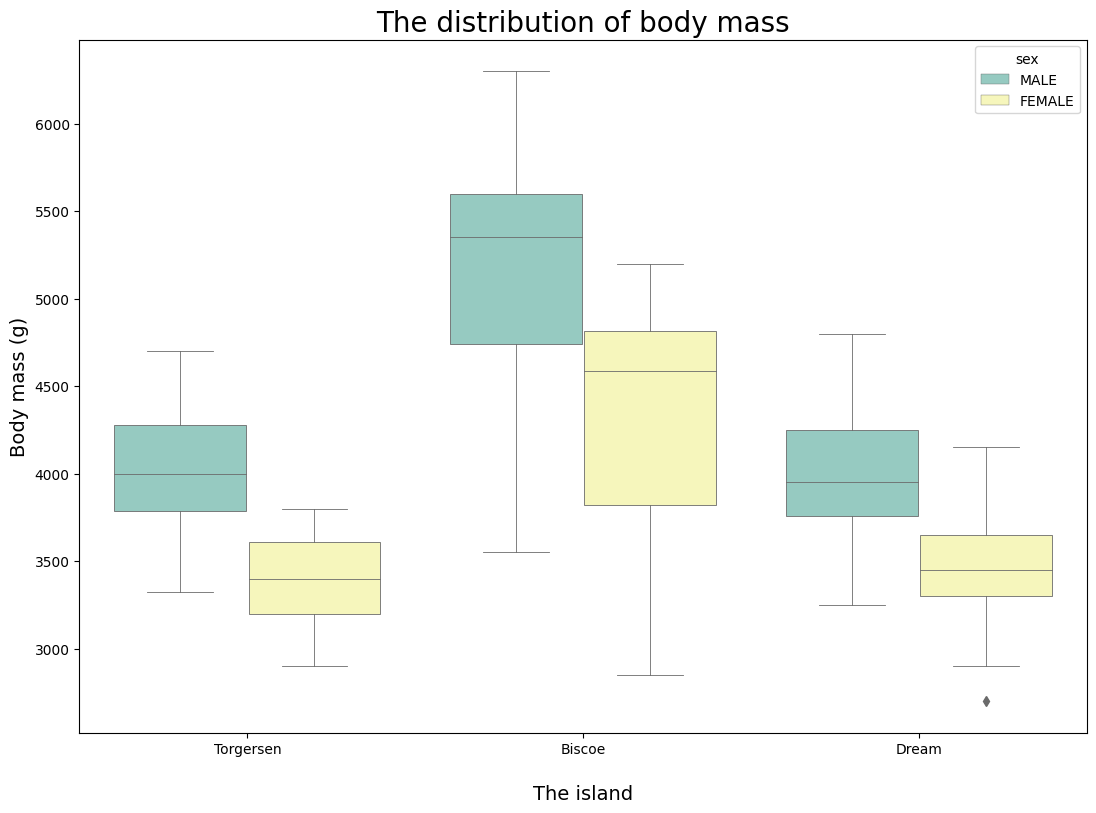

In [4]:
plt.subplots(figsize = (13,9))
sns.boxplot(data = penguins,
            x = 'island',
            y = 'body_mass_g',
            hue = 'sex',
            palette = 'Set3',
            linewidth = 0.6)
plt.xlabel('The island', fontsize = 14, labelpad = 20)     # Установка заголовка, размера шрифтов и регулировка интервала между ними
plt.ylabel('Body mass (g)', fontsize = 14)
plt.title('The distribution of body mass', fontsize = 20);

### 1.2 Stripplots
График Stripplot - это еще один вид категориального графика рассеяния, который может быть полезен при сравнении различных групп. Опять же, категории третьей переменной выделяются разными цветами.

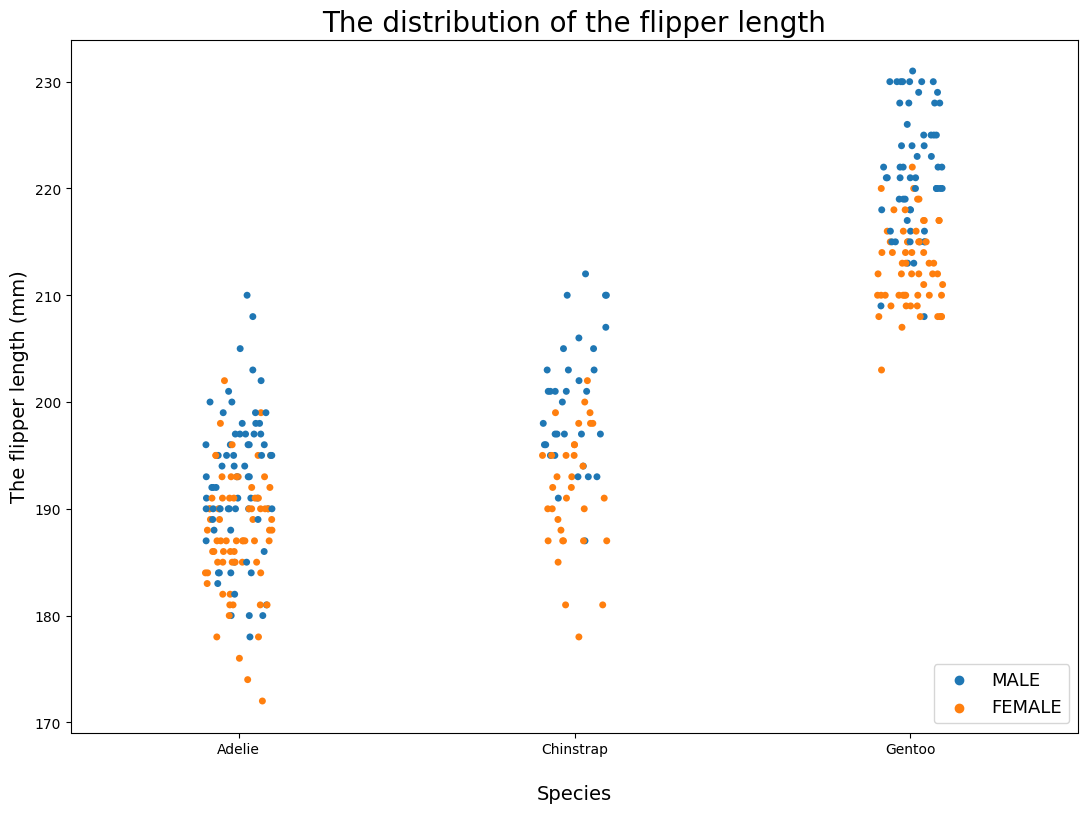

In [ ]:
plt.subplots(figsize = (13,9))
sns.stripplot(data = penguins,
              x = 'species',
              y = 'flipper_length_mm',
              hue ='sex')
plt.xlabel('Species', fontsize = 14, labelpad = 20)
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The distribution of the flipper length',
          fontsize = 20)
plt.legend(loc = 4, prop = {'size': 13});           # Настройка положения и размера легенды

На приведенном выше графике мы можем наблюдать распределение длины ласт в зависимости от вида и пола пингвинов. Благодаря добавлению третьей переменной мы сразу же видим некоторые различия и сходства между видами.

### 1.3 Relplot
Когда мы хотим увидеть возможную взаимосвязь между переменными, мы можем выбрать один из трех подходов к кодированию и решить, какой из них наиболее подходящий. В приведенном ниже примере мы видим, как масса тела и длина ласт связаны между собой в зависимости от вида пингвинов.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


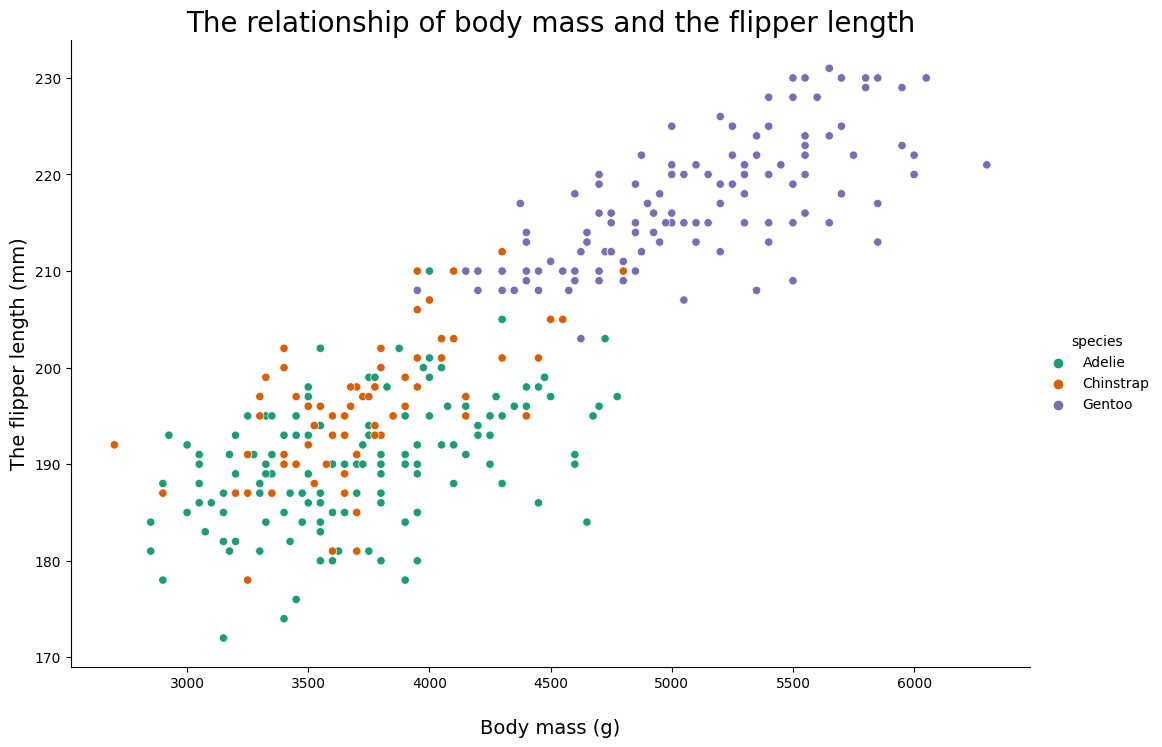

In [5]:
# Диаграмма рассеяния массы тела и длины ласт в зависимости от вида
sns.relplot(data = penguins,
            x = 'body_mass_g',
            y = 'flipper_length_mm',
            hue = 'species',
            palette = 'Dark2',
            height = 7,
            aspect = 1.5,)
plt.xlabel('Body mass (g)', fontsize = 14, labelpad = 20)
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The relationship of body mass and the flipper length', fontsize = 20);

### 1.4 Scatterplot
В некоторых случаях кодирование третьей переменной используя кодирование размером может подчеркнуть важные аспекты, которые мы обнаружили в ходе исследовательского анализа данных. На графике ниже показано, что пингвин вида Gentoo имеет самую большую массу тела и самые длинные ласты.

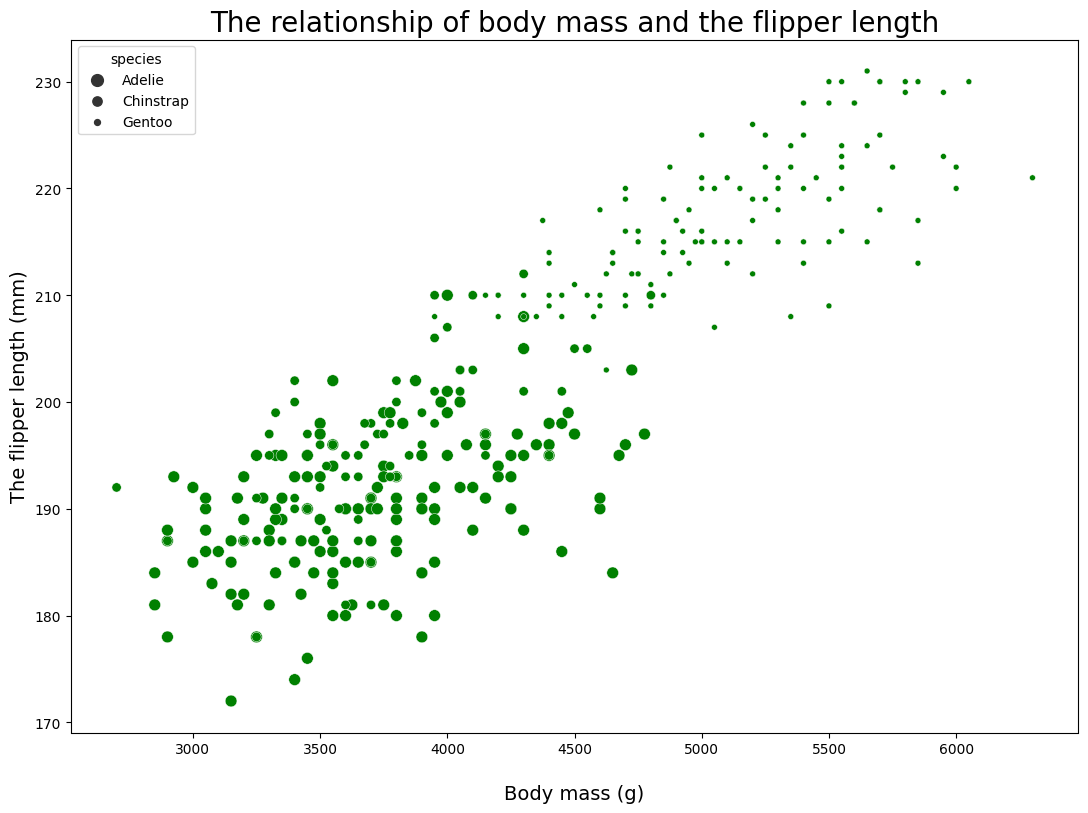

In [ ]:
fig, ax = plt.subplots(figsize = (13,9))
sns.scatterplot(data = penguins,
                x = 'body_mass_g',
                y = 'flipper_length_mm',
                size = 'species',
                color = 'green')
plt.xlabel('Body mass (g)', fontsize = 14, labelpad = 20)
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The relationship of body mass and the flipper length', fontsize = 20);

### 1.5 Lmplot
Иногда мы хотим выделить различные категории подмножества более изощренно. В этом случае мы можем выбрать специфические маркеры для каждой категории.

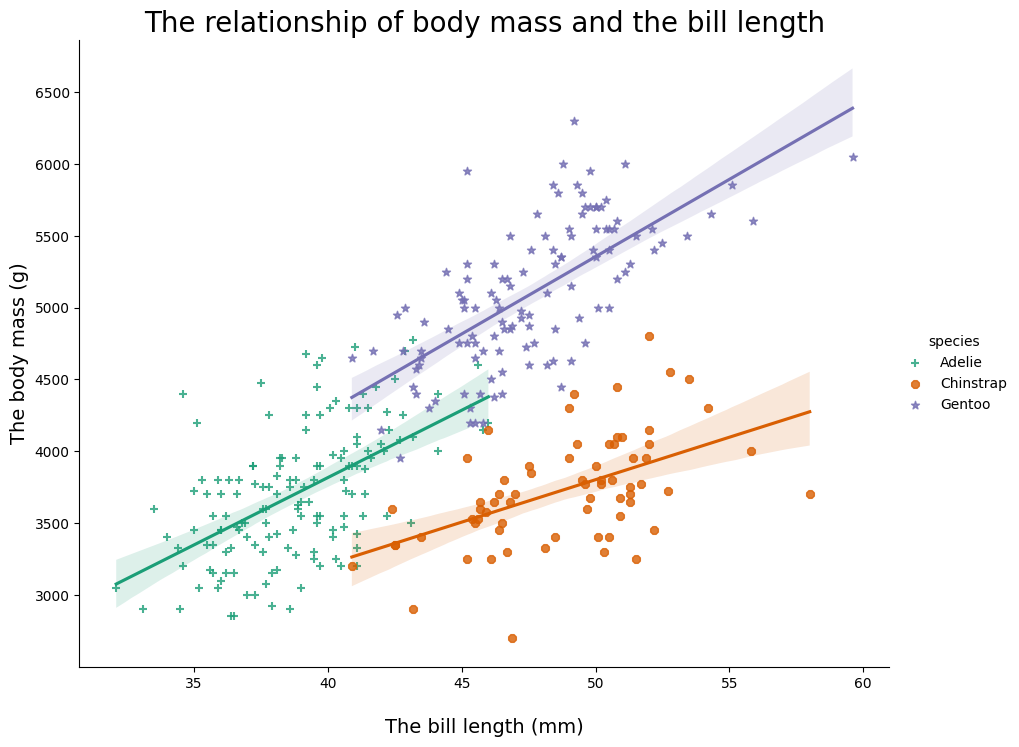

In [ ]:
sns.lmplot(data = penguins,
           x = 'bill_length_mm',
           y = 'body_mass_g',
           hue = 'species',
           markers = ['+','8','*'],
           palette = 'Dark2',
           height = 7,
           aspect = 1.3)
plt.xlabel('The bill length (mm)', fontsize = 14, labelpad = 20)
plt.ylabel('The body mass (g)', fontsize = 14)
plt.title('The relationship of body mass and the bill length', fontsize = 20);

## 2. FacetGrid
Иногда мы хотим отобразить зависимость или распределение не на одной оси, а создать отдельные рисунки. Это можно сделать с помощью объекта FacetGrid, где мы указываем 3 измерения:
- строка (row)
- колонка (col)
- hue - построение различных рисунков

Допустим, мы хотим изучить распределение видов пингвинов, поэтому мы назначаем колокну "species" как параметр col.


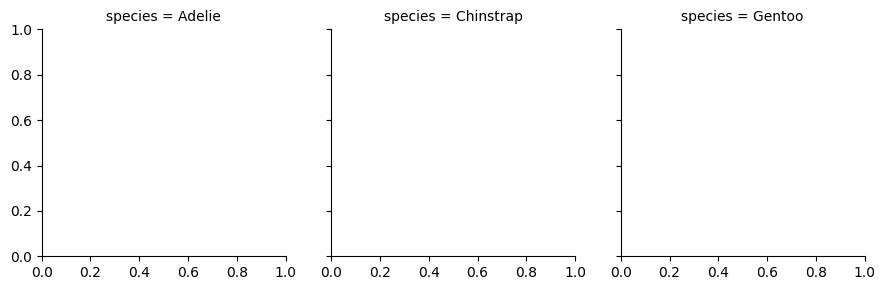

In [ ]:
g = sns.FacetGrid(penguins, col = 'species')

Когда мы инициализируем объект **FacetGrid**, будет возвращен рисунок и оси. Для создания графика мы применяем **.map()** к FacetGrid, где указываем функцию построения и переменные, которые мы хотим построить.

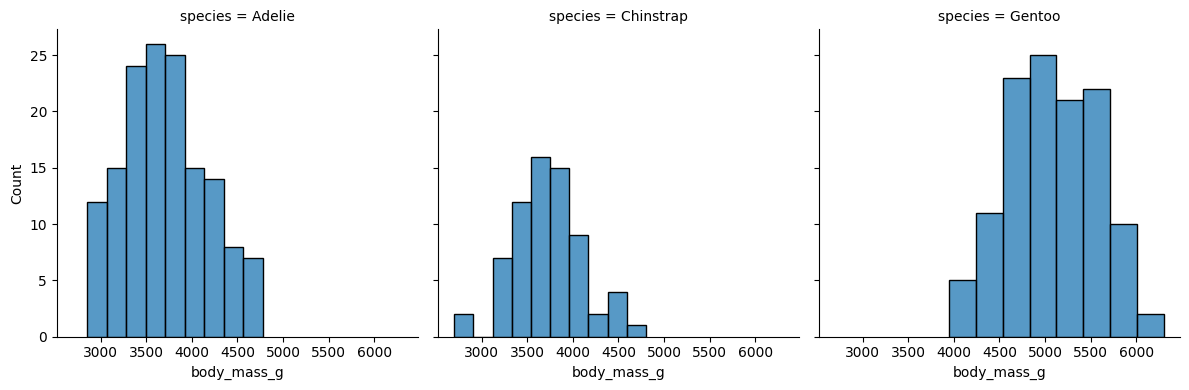

In [ ]:
# Инициализация объекта FacetGrid и параметра col
g = sns.FacetGrid(penguins,
                  col = 'species',
                  height = 4,
                  aspect = 1)
# Сопоставление функции построения и определение переменной
g.map(sns.histplot, 'body_mass_g');

Добавим третью переменную с помощью параметра **row**. Мы хотим увидеть распределение массы тела также в зависимости от пола вида.

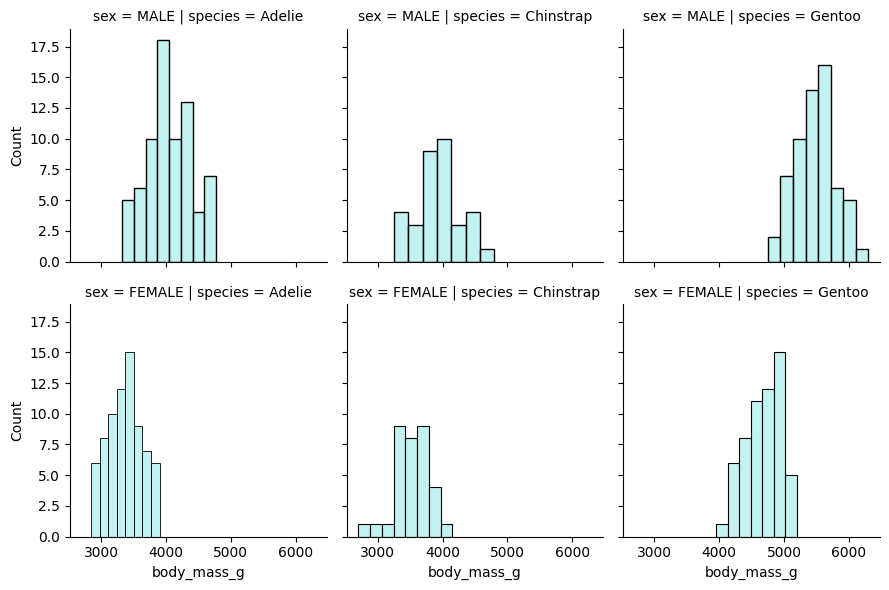

In [ ]:
# Инициализация объекта FacetGrid и параметров col и row
g = sns.FacetGrid(penguins,
                  col = 'species',
                  row = 'sex')
# Сопоставление функции построения и определение переменной
g.map(sns.histplot, 'body_mass_g', color = 'paleturquoise');

Для визуализации связи между двумя числовыми переменными мы просто добавляем определенные имена переменных. Давайте визуализируем связь между массой тела и длиной ласт в зависимости от вида пингвинов. Мы также добавим переменную пол, закодированную с помощью цвета.

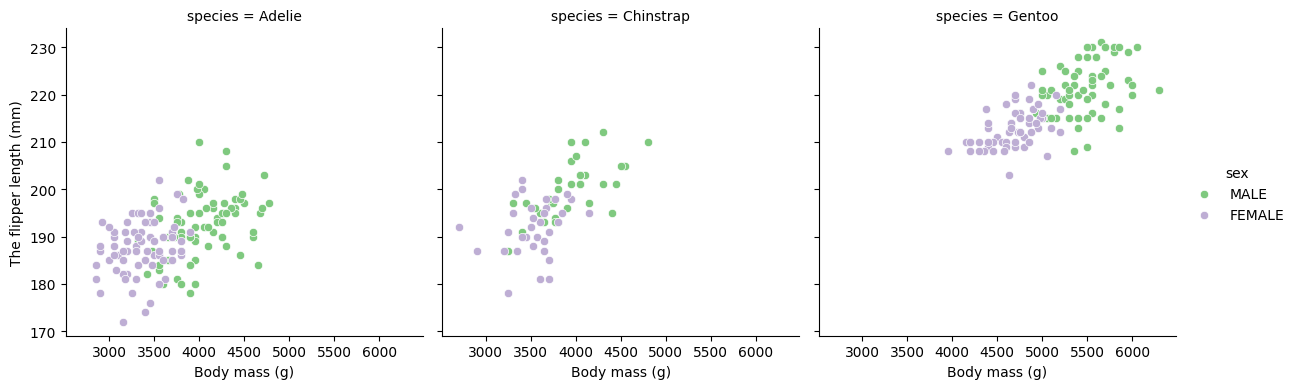

In [ ]:
# Инициализация объекта FacetGrid и параметра col
g = sns.FacetGrid(data = penguins,
                  col = 'species',
                  hue = 'sex',
                  height = 4,
                  aspect = 1,
                  palette = 'Accent')
# Сопоставление функции построения и определение переменной
g.map(sns.scatterplot, 'body_mass_g', 'flipper_length_mm')
# Установка название осе x и y
g.set_axis_labels('Body mass (g)', 'The flipper length (mm)')
# Отображение легенды
g.add_legend();

### 3. PairGrid
Парные отношения переменных можно визуализировать с помощью PairGrid. Инициализация PairGrid приводит к появлению сетки рисунков с несколькими осями. Затем мы можем вызвать функции рисования на уровне осей для построения графиков в верхнем и нижнем треугольниках, а по диагонали можно построить маргинальное распределение переменных. Создание PairGrid и FacetGrid аналогично, но главное отличие в том, что при использовании FacetGrid вы можете использовать только одну определенную функцию построения, которая применяется к каждому рисунку.

```python:
sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)
```
- data — данные;
- hue — категории, которые будут закрашиваться в разные цвета;
- palette — цветовая схема, может быть задана в виде словаря цветов;
- height — высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию func, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.

- map(func, **kwargs) — для каждой клетки применить func;
- map_diag(func, **kwargs) — для каждой клетки на диагонали применить func;
- map_offdiag(func, **kwargs) — для каждой клетки вне диагонали применить func;
- map_lower(func, **kwargs) — для каждой клетки под диагональю применить func;
- map_upper(func, **kwargs) — для каждой клетки над диагональю применить func.

### 3.1  Настройка PairGrid
Вы можете настроить вывод PairGrid несколькими способами, которые описаны в
[документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid).


Поскольку верхний и нижний треугольники имеют зеркальные графики, вы можете задать различные функции построения графиков с помощью **map_upper()** или **map.lower()**. Существуют также другие возможности для определения цветовой палитры или кодирования третьей переменной в графиках.

Аналогичного результата можно добиться с помощью **pairplot()**, но если вы хотите иметь больше контроля над сеткой рисунков, используйте PairGrid.

In [ ]:
# Определение цветов для категорий
palette = ['cornflowerblue','lightgreen','gold']
# Установка палитры
sns.set_palette(sns.color_palette(palette))

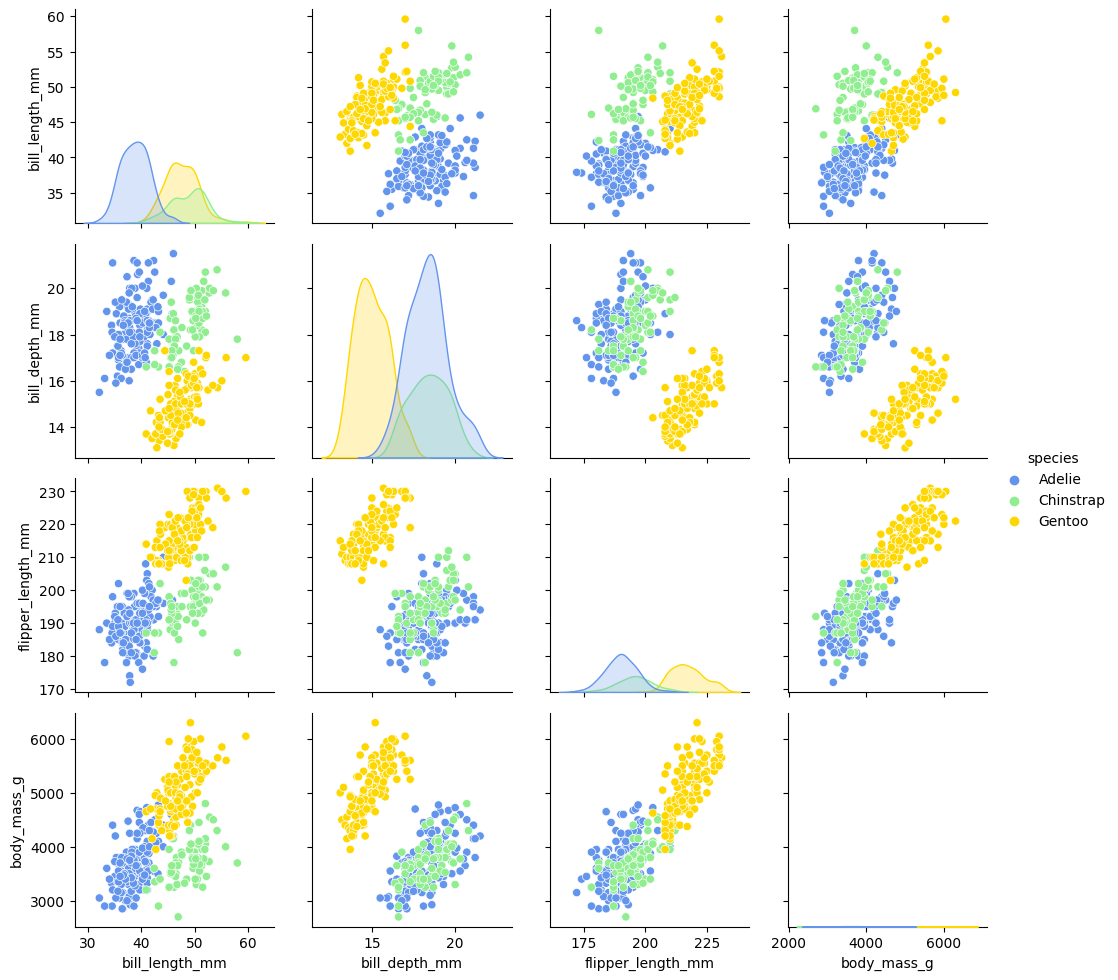

In [ ]:
# Инициализация объекта PairGrid
g_grid = sns.PairGrid(penguins, hue = 'species')

# Построение одномерного графика на диагональных рисунках
g_grid.map_diag(sns.kdeplot, fill = True)

# Построение графика взаимосвязи на внедиагональных рисунках
g_grid.map_offdiag(sns.scatterplot)
g_grid.add_legend();

## Задание для вас
1.  Как длина и глубина клюва соотносятся друг с другом в зависимости от вида пингвинов?

In [ ]:
# Напишите свой код ниже и ответьте на вопрос
